In [3]:
import os
import cv2
import numpy as np

In [4]:
data_dir = 'data'

images =[]
labels =[]

for classes_dir in os.listdir(data_dir) : 
    class_path = os.path.join(data_dir,classes_dir)
    

    print("retrieving files from ", classes_dir)

    for file in os.listdir(class_path) :
        if file.endswith('.png') :
            
            img_path = os.path.join(class_path , file)
            img = cv2.imread(img_path)

            if img is not None :
                
                images.append(img)
                labels.append(classes_dir)
                
images =np.array(images)
labels =np.array(labels)

retrieving files from  A
retrieving files from  B
retrieving files from  C
retrieving files from  D
retrieving files from  E
retrieving files from  F
retrieving files from  G
retrieving files from  H
retrieving files from  I
retrieving files from  J
retrieving files from  K
retrieving files from  L
retrieving files from  M
retrieving files from  N
retrieving files from  O
retrieving files from  P
retrieving files from  Q
retrieving files from  R
retrieving files from  S
retrieving files from  T
retrieving files from  U
retrieving files from  V
retrieving files from  W
retrieving files from  X
retrieving files from  Y
retrieving files from  Z


(128, 128, 3) (79860,)


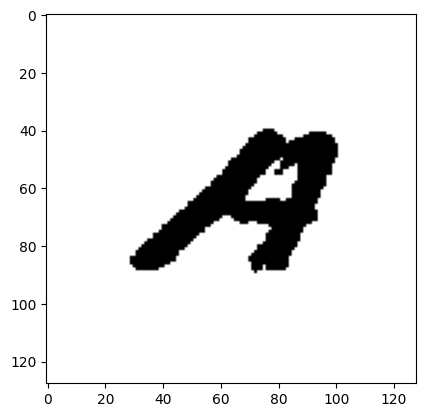

In [5]:
from matplotlib import pyplot as plt

print(images[0].shape,labels.shape)
u = np.unique(labels)
u.shape
plt.imshow(images[1221])

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
labels = le.fit_transform(labels)

In [6]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

X_train ,X_test ,Y_train,Y_test = train_test_split(images,labels,test_size = 0.3,shuffle =True)
X_train ,X_val ,Y_train,Y_val = train_test_split(X_train,Y_train,test_size = 0.3,shuffle =True)

from keras import Sequential
from keras.layers import Dense , Conv2D , MaxPooling2D ,Flatten



In [75]:
model = Sequential()

model.add(Conv2D(10, (3,3) ,1, activation = 'relu', input_shape=(128,128,3)))
model.add(MaxPooling2D())
model.add(Conv2D(8, (3,3) ,1, activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(8, (3,3) ,1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(32 , activation = 'relu'))
model.add(Dense(16 , activation = 'relu'))
model.add(Dense(26 , activation = 'softmax'))


model.compile(optimizer = 'adam' ,loss = 'sparse_categorical_crossentropy' ,metrics ='accuracy')

In [ ]:
model.fit(X_train,Y_train,epochs =5 , validation_data = (X_val,Y_val))

Epoch 1/5
1223/1223 [==============================] - 187s 151ms/step - loss: 2.6305 - accuracy: 0.2953 - val_loss: 1.5459 - val_accuracy: 0.5241
Epoch 2/5
1223/1223 [==============================] - 182s 149ms/step - loss: 1.0382 - accuracy: 0.6838 - val_loss: 0.6957 - val_accuracy: 0.7982
Epoch 3/5
1223/1223 [==============================] - 414s 339ms/step - loss: 0.5936 - accuracy: 0.8263 - val_loss: 0.5334 - val_accuracy: 0.8474
Epoch 4/5
1223/1223 [==============================] - 252s 206ms/step - loss: 0.4634 - accuracy: 0.8647 - val_loss: 0.4713 - val_accuracy: 0.8683
Epoch 5/5
1037/1223 [========================>.....] - ETA: 33s - loss: 0.3887 - accuracy: 0.8877

In [ ]:
joblib.dump(model,'digit_model.pkl')


In [2]:
import joblib
model = joblib.load('digit_model.pkl')

In [11]:
yhat = model.predict(X_test)

yhat = np.argmax(yhat,axis=1)

749/749 [==============================] - 30s 40ms/step


In [15]:
 for i in range(len(yhat)) :
     print(yhat[i],Y_test[i])

17 17
19 19
4 4
3 3
10 10
0 0
21 21
16 16
3 3
8 9
1 1
25 25
22 22
24 20
23 23
8 8
22 22
18 9
7 7
10 10
6 6
5 18
13 13
12 12
20 20
15 15
14 14
14 14
10 10
16 16
8 8
10 10
16 16
5 5
22 22
15 15
18 18
21 21
22 22
15 24
18 18
10 10
20 20
15 15
21 20
21 21
11 11
21 21
2 2
11 11
4 4
1 1
19 19
25 8
16 16
9 19
12 12
10 5
21 21
0 0
9 9
11 11
8 8
1 1
8 8
1 1
6 6
17 17
24 24
22 22
3 3
17 17
16 16
10 10
2 2
5 19
5 5
16 16
8 8
23 23
22 22
8 8
23 23
8 8
10 10
12 12
2 2
23 23
18 18
24 24
8 8
10 10
18 18
2 2
4 4
25 25
8 8
1 25
10 10
19 19
1 1
6 11
6 6
8 8
3 3
2 2
8 8
23 23
20 20
8 8
17 15
0 0
8 8
12 12
8 8
20 20
8 8
23 23
19 19
17 5
2 2
7 7
8 8
14 14
3 3
16 0
8 8
3 3
15 15
10 10
6 6
3 3
14 14
1 1
21 21
17 17
11 11
10 10
13 13
12 12
9 9
15 14
8 8
19 19
7 7
21 21
11 2
9 9
8 8
18 18
19 19
5 5
0 0
15 15
0 0
12 12
21 21
8 8
25 25
0 0
2 2
10 23
23 19
7 7
20 20
17 17
8 8
6 6
13 13
0 21
20 20
3 3
1 1
8 8
6 6
21 21
1 1
2 2
0 0
24 21
1 1
25 25
1 1
21 21
10 23
22 22
20 20
22 22
18 18
25 25
7 7
18 18
14 14
18 18
